In [ ]:
# !pip install kaggle

In [ ]:
# !pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# PLN - estudo Parte 01

* importar arquivo do `kaggle`
* tokenizando os comentários
* visualizar as palavras mais repetidas entre os comentários `positivos` e `negativos`
* criando função para facilitar as `visualizações`
* removendo as `StopWords`

In [ ]:
# importando bibliotecas mais usados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# demais frameworks usadas
# divisao dos treinos e testes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
# visualizar as principais palavras
from wordcloud import WordCloud
# remoção das StopWords
import nltk
from nltk import tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importando arquivo do kaggle

In [ ]:
#!pip install kaggle; 
#caso seja necessário atualizar a biblioteca no google colab
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle datasets download -d luisfredgs/imdb-ptbr

#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle.json
 95% 46.0M/48.4M [00:00<00:00, 170MB/s]
100% 48.4M/48.4M [00:00<00:00, 157MB/s]
Archive:  imdb-ptbr.zip
replace imdb-reviews-pt-br.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imdb-reviews-pt-br.csv  


## Primeiras Análises

In [ ]:
df = pd.read_csv('/content/imdb-reviews-pt-br.csv')

In [ ]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
n_linhas = df.shape[0]
n_colunas = df.shape[1]

print(f'O dataset possui {n_linhas} linhas e {n_colunas} colunas')

O dataset possui 49459 linhas e 4 colunas


In [ ]:
print('O data set não apresenta dados nulos: \n')
df.isnull().sum()

O data set não apresenta dados nulos: 



id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

In [ ]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

## Realizando o Train_Test_Slit

In [ ]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 144

x_train, x_test, y_train, y_test = train_test_split(
                                                    df.text_pt,
                                                    df.sentiment,
                                                    random_state = SEED
                                                    )

In [ ]:
'''from sklearn.linear_model import LogisticRegression

reg_logistica = LogisticRegression()
reg_logistica.fit(x_train, y_train)
acuracia = reg_logistica.score(x_test, y_test)

print(f'acuracia')'''

"from sklearn.linear_model import LogisticRegression\n\nreg_logistica = LogisticRegression()\nreg_logistica.fit(x_train, y_train)\nacuracia = reg_logistica.score(x_test, y_test)\n\nprint(f'acuracia')"

In [ ]:
print('NEGATIVO \n')
print(df.text_pt[129])

NEGATIVO 

É difícil e eu não esperava ... Mas é realmente o pior filme que eu e minha esposa vimos. Diálogos terríveis que se estendem incompreensivelmente através do tempo, sem nenhuma razão aparente, exceto para preencher o tempo. A narração de histórias não segue um caminho abrangente e inteligível? tudo está uma bagunça. A ação e os diálogos aparecem em saltos. O que mais me decepcionou foi ver Dominique Pinon, um dos meus atores favoritos franceses envolvidos nisso? uh? Eu nem sei como descrevê-lo sem ser educado? O resto dos atores onde no mais pobres. Susan Paterno fez uma interpretação terrível de seu personagem, fazendo uma performance inexpressiva e plana. Efeitos especiais ruins. Eu não acho que foi um completo desperdício de filme, mas o seu próximo? Se eu disser que aconselho a todos a não ver este filme. Eu acho que seria um completo desperdício de tempo. Sinceramente, eu nunca diria algo assim sobre um filme, mas? Há sempre uma primeira vez.


In [ ]:
print('POSITIVO \n')
print(df.text_pt[49002])

POSITIVO 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [ ]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [ ]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
dicionario = {
    'neg': 0,
    'pos': 1
}

df['classificacao'] = df.sentiment.replace(dicionario)
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [ ]:
df.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto_teste = ['Assisti um filme ótimo','Assisti um filme ruim']
vetorizar = CountVectorizer(lowercase= False) # lowercase= False -> deixando o texto como está
bag_of_words = vetorizar.fit_transform(texto_teste)

In [ ]:
vetorizar.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [ ]:
display(bag_of_words)
print('\n Assim podemos vizualiza que a Bag of Words criada possui uma Matriz Sparse de 2x5')

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>


 Assim podemos vizualiza que a Bag of Words criada possui uma Matriz Sparse de 2x5


In [ ]:
matriz_sparsa =  pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_sparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [ ]:
vetorizar = CountVectorizer(lowercase= False) # lowercase= False -> deixando o texto como está
bag_of_words = vetorizar.fit_transform(df.text_pt)
print(bag_of_words.shape)
print(f'\n Podemos observar possuimos {bag_of_words.shape[1]} dimensões e isso aumenta o consumo de mémoria dos nossos processo')

(49459, 156923)

 Podemos observar possuimos 156923 dimensões e isso aumenta o consumo de mémoria dos nossos processo


In [ ]:
# lowercase= False -> deixando o texto como está
# max_features= 50 -> fixando a quantidade de dimensoes da nossa matriz

vetorizar = CountVectorizer(lowercase= False, max_features= 50) 
bag_of_words = vetorizar.fit_transform(df.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(
                                                    bag_of_words, # adicionado o baf_of_words nos parâmetros 
                                                    df.classificacao,
                                                    random_state = SEED
                                                    )

reg_logistica = LogisticRegression()
reg_logistica.fit(x_train, y_train)
acuracia = reg_logistica.score(x_test, y_test)

print(f'Acurácia é de {(acuracia*100).round(2)}%')

Acurácia é de 65.83%


In [ ]:
# criando função para classificar o texto

def classificar_texto(texto, coluna_texto, coluna_classificacao):
  # vetorizando a baf_of_words
  vetorizar = CountVectorizer(lowercase= False, max_features= 50) 
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  # realizando o treino e test
  SEED = 42
  x_train, x_test, y_train, y_test = train_test_split(
                                                    bag_of_words, # adicionado o baf_of_words nos parâmetros 
                                                    texto[coluna_classificacao],
                                                    random_state = SEED
                                                    )
  # realizando a LogisticRegression
  reg_logistica = LogisticRegression()
  reg_logistica.fit(x_train, y_train)
  return reg_logistica.score(x_test, y_test)

classificacao_print = classificar_texto(df, 'text_pt', 'classificacao')
print(f'Classificação é de {(classificacao_print*100).round(2)}%')

Classificação é de 65.83%


## WorldClound

In [ ]:
todas_palavras = [texto for texto in df['text_pt']]
len(todas_palavras)

49459

In [ ]:
todas_palavras = ' '.join([texto for texto in df['text_pt']])
len(todas_palavras)

63448424

In [ ]:
%matplotlib inline

from wordcloud import WordCloud

nuvem_palavras = WordCloud(
                           width = 800, height = 500,
                           max_font_size= 110,
                           collocations= False).generate(todas_palavras)
                          # width = 800, height = 500 -> dimensões das imagens
                          # max_font_size= 110        -> tamanho máximo das letras
                          # collocations= False       -> evitando repetição
                        

<function matplotlib.pyplot.show(*args, **kw)>

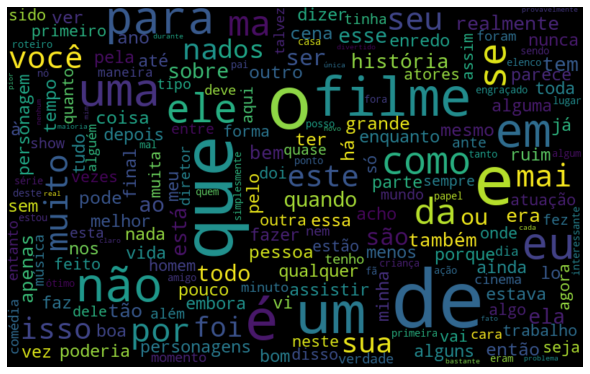

In [ ]:
# plotando o WordCloud
plt.figure(figsize=(8,6))
plt.imshow(nuvem_palavras, interpolation= 'bilinear') # interpolation= 'bilinear' -> nitidez palavra
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0)
plt.show

### Segregando entre negativo e positivo

In [ ]:
df.query('sentiment == "pos"')

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [ ]:
# criando funcao para segregar entre positivo e negativo

def nuvem_palavras_neg(texto, coluna_texto):
  # unido as palavras
  texto_negativo = texto.query('sentiment == "neg"')
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
  
  # realizando o WordClound
  nuvem_palavras = WordCloud(
                           width = 800, height = 500,
                           max_font_size= 110,
                           collocations= False).generate(todas_palavras)
                          # width = 800, height = 500 -> dimensões das imagens
                          # max_font_size= 110        -> tamanho máximo das letras
                          # collocations= False       -> evitando repetição
  # plotando o WordCloud
  plt.figure(figsize=(8,6))
  plt.imshow(nuvem_palavras, interpolation= 'bilinear') # interpolation= 'bilinear' -> nitidez palavra
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout(pad = 0)
  plt.show

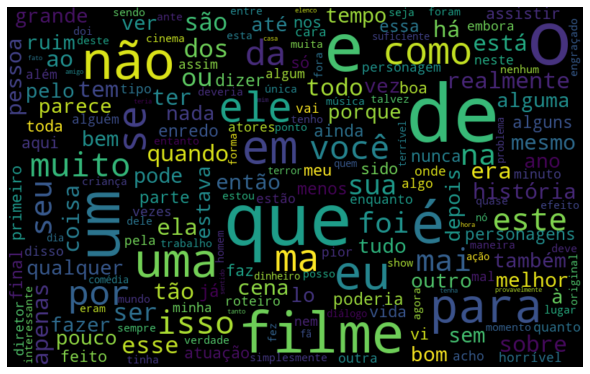

In [ ]:
nuvem_palavras_neg(df, 'text_pt')

In [ ]:
# criando funcao para segregar entre positivo e positivo

def nuvem_palavras_pos(texto, coluna_texto):
  # unido as palavras
  texto_positivo = texto.query('sentiment == "pos"')
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
  
  # realizando o WordClound
  nuvem_palavras = WordCloud(
                           width = 800, height = 500,
                           max_font_size= 110,
                           collocations= False).generate(todas_palavras)
                          # width = 800, height = 500 -> dimensões das imagens
                          # max_font_size= 110        -> tamanho máximo das letras
                          # collocations= False       -> evitando repetição
  # plotando o WordCloud
  plt.figure(figsize=(8,6))
  plt.imshow(nuvem_palavras, interpolation= 'bilinear') # interpolation= 'bilinear' -> nitidez palavra
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout(pad = 0)
  plt.show

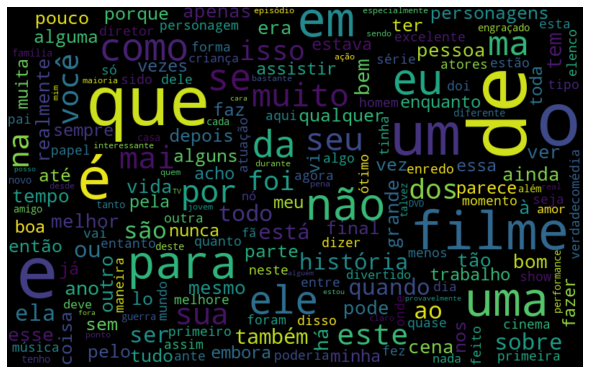

In [ ]:
nuvem_palavras_pos(df, 'text_pt')

## Palavras com maior frequência com o NLTK

In [ ]:
import nltk

frase = ["um filme ruim", "um filme bom"]

frequencia = nltk.FreqDist(frase)

In [ ]:
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

### Tokenização 

In [ ]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


### Implementando a tokenização no dataset

In [ ]:
token_frase = token_espaco.tokenize(frase)
frequencia = nltk.FreqDist(token_frase)

display(frequencia)

FreqDist({'Bem': 1, 'vindo': 1, 'ao': 1, 'mundo': 1, 'do': 1, 'PLN!': 1})

In [ ]:
# aplicando a tokenizacao na var "todas_palavras"
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

display(frequencia)

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [ ]:
# aplicando a tokenizacao na var "todas_palavras"
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [ ]:
df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                              "Frequencia": list(frequencia.values())
                              })
# nlargest -> lista em ordem decrescente 
# n=10 -> apenas as 10 primeiras
df_frequencia.nlargest(columns = "Frequencia", n=10)

,Palavras,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


### Criando uma nova visualização

[Text(0, 0.5, 'Contagem')]

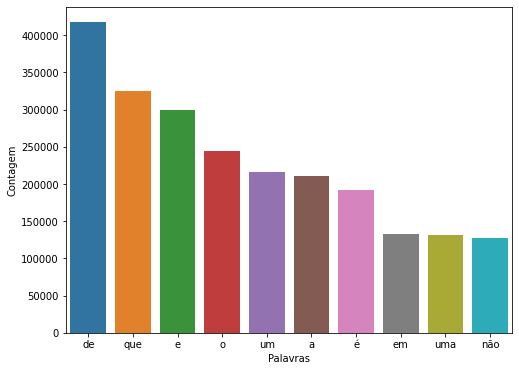

In [ ]:
import seaborn as sns

plt.figure(figsize = (8,6))
ax = sns.barplot(data= df_frequencia.nlargest(columns = "Frequencia", n=10),
                 x= "Palavras",
                 y= "Frequencia",
                 )
ax.set(ylabel= "Contagem")

In [ ]:
total = df_frequencia['Frequencia'].sum()
df_frequencia['Porcentagem'] = df_frequencia['Frequencia'].cumsum() / total *100

In [ ]:
# Criando funcao para o grafico de Barra para realizar o grafico de Pareto

def grafico_barra(texto, coluna_texto, quantidade):
  # todas as palavras
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

  # aplicando a tokenizacao
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)

  # criando DataFrame
  df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                                "Frequencia": list(frequencia.values())
                                })
  # alterando o df_frequencia
  df_frequencia = df_frequencia.nlargest(columns = "Frequencia", n= quantidade)
  # plotando imagem
  plt.figure(figsize = (8,6))
  ax = sns.barplot( data= df_frequencia,
                    x= "Palavras",
                    y= "Frequencia",
                    )
  ax.set(ylabel= "Contagem")

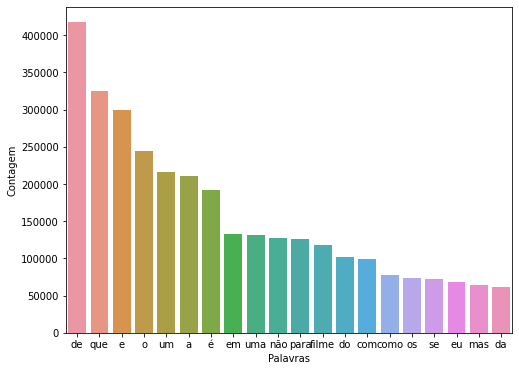

In [ ]:
grafico_barra(df, "text_pt", 20)

In [ ]:
# Criando funcao para o grafico de Pareto

def pareto(texto, coluna_texto, quantidade):
  # todas as palavras
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

  # aplicando a tokenizacao
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)

  # criando DataFrame
  df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                                "Frequencia": list(frequencia.values())
                                })
  # realizando o calculo da porcentagem
  total = df_frequencia['Frequencia'].sum()
  df_frequencia['Porcentagem'] = df_frequencia['Frequencia'].cumsum() / total *100

  # alterando o df_frequencia
  df_frequencia = df_frequencia.nlargest(columns = "Frequencia", n= quantidade)
  
  # plotando imagem
  plt.figure(figsize = (8,6))
  ax = sns.barplot( data= df_frequencia, x= "Palavras", y= "Frequencia")
  ax2 = ax.twinx()
  sns.lineplot(
              data= df_frequencia, x= "Palavras", y= "Porcentagem",
              color = 'red', sort= False, 
              ax = ax2)
  ax.set(ylabel= "Contagem")
  plt.show

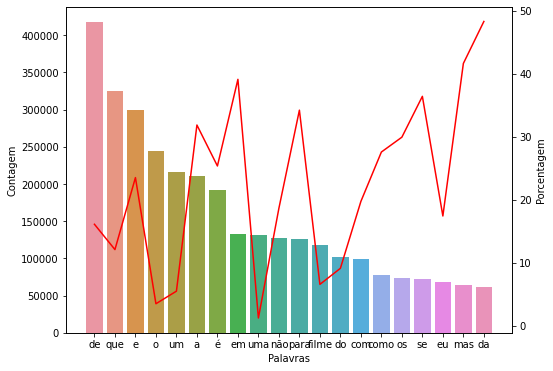

In [ ]:
pareto(df, "text_pt", 20)

## Realizando StopWords

In [ ]:
import nltk
nltk.download('stopwords')

# palavras a serem retiradas
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [ ]:
# palavras a serem retiradas
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

# criando script de pré processamento para cada frase retirar as stopswords
frase_processada = list()

# criando laco para os comentários
for comentario in df.text_pt:
  # tokenizando os comentários
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(comentario)
  # laco para a retirada das StopsWords
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  # juntando as palavras processadas
  frase_processada.append(' '.join(nova_frase))

df['tratamento_pt1'] = frase_processada

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_pt1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


## Resultado

In [ ]:
classificar_texto(df, 'tratamento_pt1', 'classificacao')

0.6811160533764659

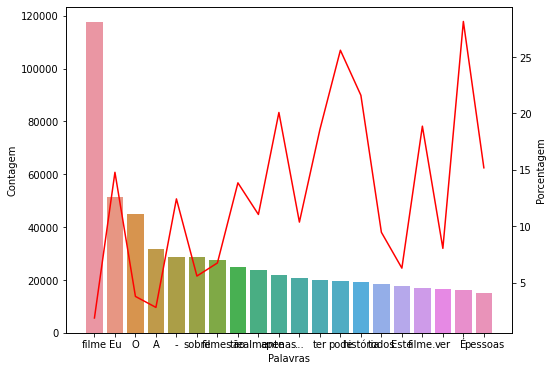

In [ ]:
pareto(df, "tratamento_pt1", 20)

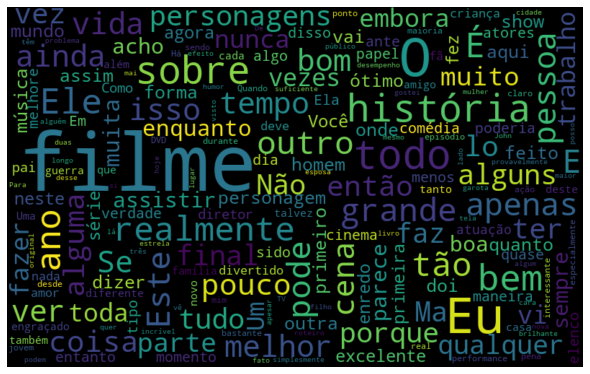

In [ ]:
nuvem_palavras_pos(df, 'tratamento_pt1')

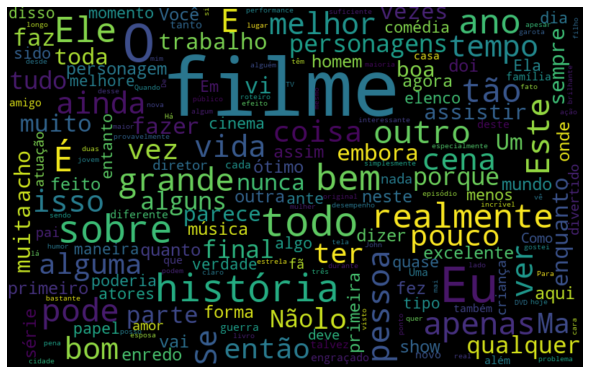

In [ ]:
nuvem_palavras_pos(df, 'tratamento_pt1')

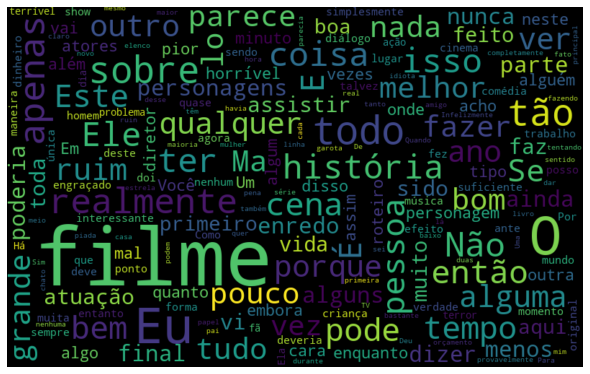

In [ ]:
nuvem_palavras_neg(df, 'tratamento_pt1')

# PLN - estudo Parte 02

Melhorando o processamento das StopsWords
* removendo as acentuações 
* removendo súfixos com o conceito de `stemming`
* evitando flexões e derivações de palavras com `stremming`

In [ ]:
# demais frameworks usadas

# remoção das pontuações
from string import punctuation
# remoção dos acentos
import unidecode # se necessário !pip install unidecode e reiniciar o notebook
# removendo sufixos
from nltk.stem import RSLPStemmer

## Outros Tratamentos

### Removendo Pontuações

In [ ]:
from nltk import tokenize


frase = 'Oi, mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Oi', ',', 'mundo', '!']


In [ ]:
from string import punctuation

# crinado lista de pontuacao
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()

for comentario in df.tratamento_pt1:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(comentario)

  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

df['tratamento_pt2'] = frase_processada


In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_pt1,tratamento_pt2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [ ]:
df.tratamento_pt1[0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [ ]:
df.tratamento_pt2[0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

#### Resultado

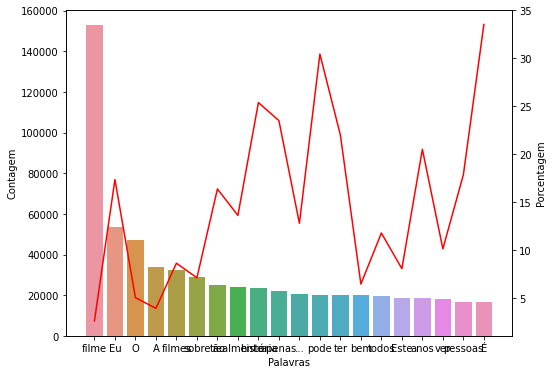

In [ ]:
pareto(df, 'tratamento_pt2', 20)

### Removendo Acentuação

In [ ]:
# !pip install unidecode -> caso necessario instalar a biblioteca e reinicar a máquina
import unidecode

acentos = 'Ótimo péssimo não é tão'
test = unidecode.unidecode(acentos)
print(test)

Otimo pessimo nao e tao


In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in df.tratamento_pt2]

In [ ]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
df['tratamento_pt3'] = sem_acentos

frase_processada = list()

for comentario in df.tratamento_pt3:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(comentario)

  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

df['tratamento_pt3'] = frase_processada

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_pt1,tratamento_pt2,tratamento_pt3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [ ]:
df.tratamento_pt3[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

#### Resultado

In [ ]:
acuracia_tratamento_3 = classificar_texto(df,'tratamento_pt3', 'classificacao')
print((acuracia_tratamento_3*100).round(2))

68.88


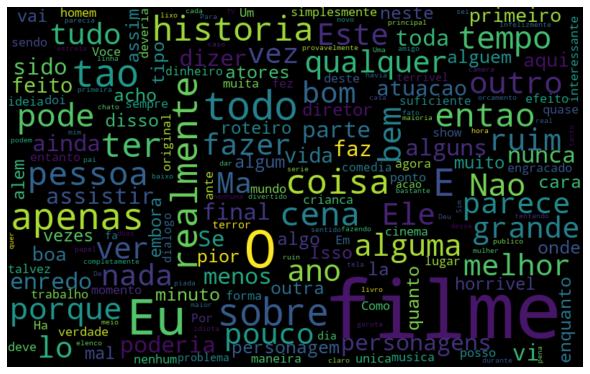

In [ ]:
nuvem_palavras_neg(df, 'tratamento_pt3')

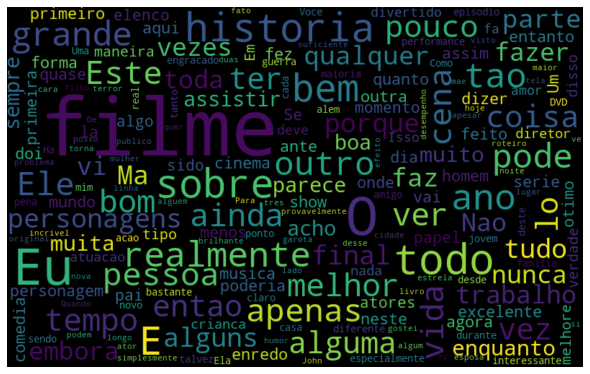

In [ ]:
nuvem_palavras_pos(df, 'tratamento_pt3')

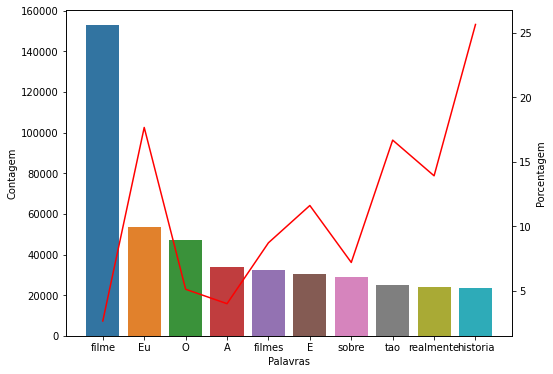

In [ ]:
pareto(df, 'tratamento_pt3', 10)

### Transformando dados em minúsculos

In [ ]:
frase = 'O Tiago é o novo instrutor da Alura'
print(frase.lower())

o tiago é o novo instrutor da alura


criando o tratamento_pt4 e aplicando o `lower`

In [ ]:
frase_processada = list()

for comentario in df.tratamento_pt3:
  comentario = comentario.lower()
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(comentario)

  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

df['tratamento_pt4'] = frase_processada

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_pt1,tratamento_pt2,tratamento_pt3,tratamento_pt4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [ ]:
df.text_pt[0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [ ]:
df.tratamento_pt4[0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

#### Resultados

In [ ]:
acuracia_tratamento_4 = classificar_texto(df,'tratamento_pt4', 'classificacao')
print((acuracia_tratamento_4*100).round(2))
print((acuracia_tratamento_3*100).round(2))

68.74
68.88


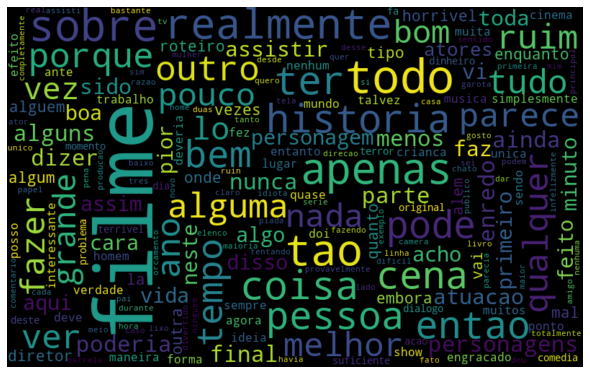

In [ ]:
nuvem_palavras_neg(df, 'tratamento_pt4')

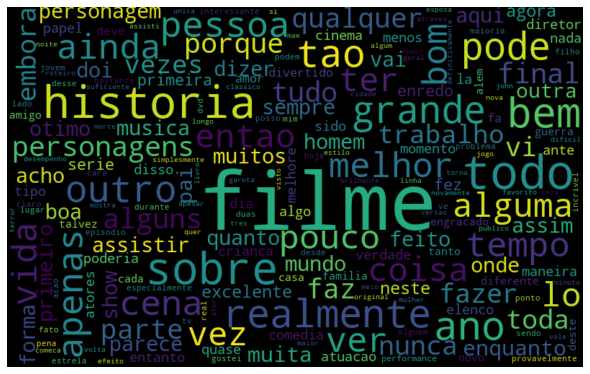

In [ ]:
nuvem_palavras_pos(df, 'tratamento_pt4')

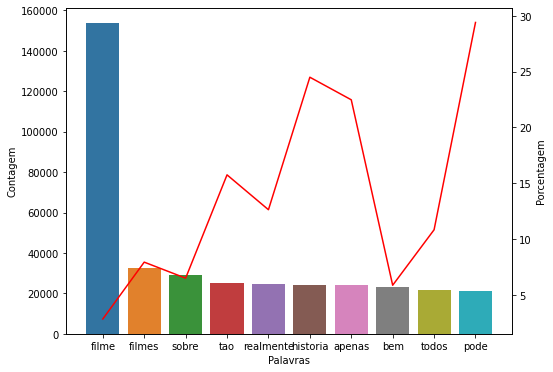

In [ ]:
pareto(df, 'tratamento_pt4', 10)

## Removendo Sufixos

In [ ]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
from nltk.stem import RSLPStemmer


stemmer = nltk.RSLPStemmer()
stemmer.stem('correria')

'corr'

In [ ]:
frase_processada = list()

for comentario in df.tratamento_pt4:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(comentario)

  for palavra in palavras_texto:
    nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

df['tratamento_pt5'] = frase_processada

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_pt1,tratamento_pt2,tratamento_pt3,tratamento_pt4,tratamento_pt5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [ ]:
acuracia_tratamento_5 = classificar_texto(df,'tratamento_pt5', 'classificacao')
print((acuracia_tratamento_5*100).round(2))
print((acuracia_tratamento_4*100).round(2))
print((acuracia_tratamento_3*100).round(2))

69.54
68.74
68.88


In [ ]:
print((acuracia_tratamento_4*100).round(2))

68.74


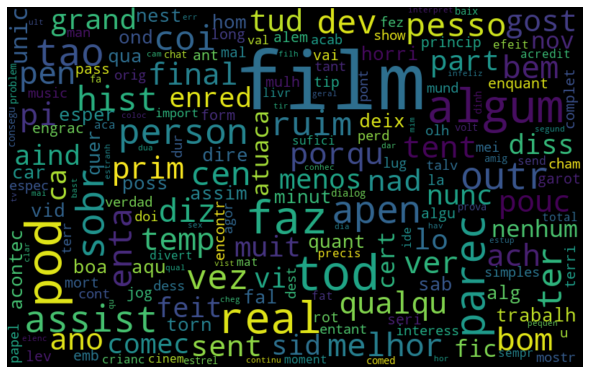

In [ ]:
nuvem_palavras_neg(df, 'tratamento_pt5')

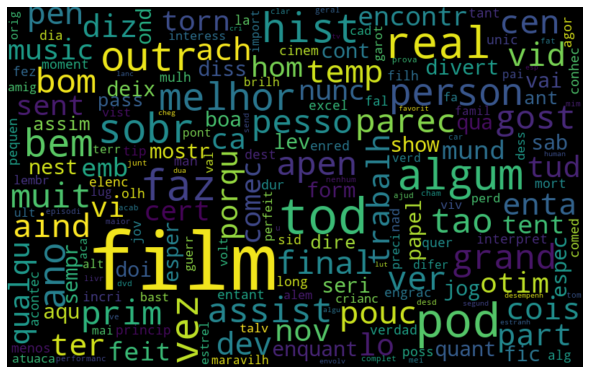

In [ ]:
nuvem_palavras_pos(df, 'tratamento_pt5')

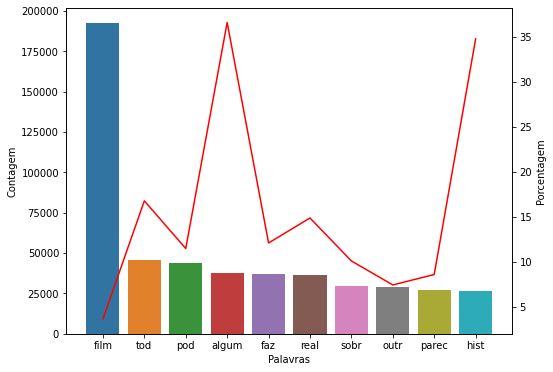

In [ ]:
pareto(df, 'tratamento_pt5', 10)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']

tfidf = TfidfVectorizer(lowercase= False, max_features= 50,)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(), 
    columns = tfidf.get_feature_names(),
)
 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_pt1,tratamento_pt2,tratamento_pt3,tratamento_pt4,tratamento_pt5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [ ]:
tfidf_bruto = tfidf.fit_transform(df['text_pt'])

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(
                                                    tfidf_bruto,
                                                    df.classificacao,
                                                    random_state = SEED
                                                    )

reg_logistica.fit(x_train, y_train)
acuracia_tfidf =  reg_logistica.score(x_test, y_test)
print(acuracia_tfidf)

0.6600889607763849


In [ ]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_pt5'])

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(
                                                    tfidf_tratados,
                                                    df.classificacao,
                                                    random_state = SEED
                                                    )

reg_logistica.fit(x_train, y_train)
acuracia_tfidf =  reg_logistica.score(x_test, y_test)
print(acuracia_tfidf)

0.6963202587949858


In [ ]:
print(acuracia_tratamento_5)
print(acuracia_tratamento_4)
print(acuracia_tratamento_3)

0.6954306510311363
0.6874241811564901
0.6887990295188031


## Ngrams

In [ ]:
from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [ ]:
tfidf = TfidfVectorizer(lowercase= False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_pt5'])


SEED = 42
x_train, x_test, y_train, y_test = train_test_split(
                                                    vetor_tfidf,
                                                    df.classificacao,
                                                    random_state = SEED
                                                    )

reg_logistica.fit(x_train, y_train)
acuracia_tfidf_nfram =  reg_logistica.score(x_test, y_test)
print(acuracia_tfidf_nfram)

0.8856449656287909


In [ ]:
print(acuracia_tratamento_5)
print(acuracia_tratamento_4)
print(acuracia_tratamento_3)

0.6954306510311363
0.6874241811564901
0.6887990295188031


In [ ]:
tfidf = TfidfVectorizer(lowercase= False)
vetor_tfidf = tfidf.fit_transform(df['tratamento_pt5'])


SEED = 42
x_train, x_test, y_train, y_test = train_test_split(
                                                    vetor_tfidf,
                                                    df.classificacao,
                                                    random_state = SEED
                                                    )

reg_logistica.fit(x_train, y_train)
acuracia_tfidf_nfram =  reg_logistica.score(x_test, y_test)
print(acuracia_tfidf_nfram)

0.8847553578649414


In [ ]:
pesos = pd.DataFrame(
    reg_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
# pesos positivos
pesos.nlargest(50, 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
otim,8.308451
excel,7.993105
perfeit,6.548647
favorit,5.781222
maravilh,5.291919
incri,5.052568
hilari,4.654489
divert,4.552203
ador,4.410095
brilh,4.268983


In [ ]:
# pesos negativos
pesos.nsmallest(50,0)

,0
pi,-9.184374
ruim,-9.178711
horri,-8.761561
terri,-7.195839
chat,-6.921857
nad,-6.032458
infeliz,-5.298478
decepca,-4.985072
ridicul,-4.971446
parec,-4.938893
